In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales.csv')
df2 = pd.read_csv('cpi.csv')

/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_89219/838498863.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales.csv')


In [3]:
#data cleaning on first frame
print(df.isnull().sum().sum())
df.dtypes
df['order_date'] = pd.to_datetime(df['order_date'],utc=True)
df = df[['order_id','order_date','status', 'item_id', 'qty_ordered', 'price', 'value', 'County','payment_method','category','Gender','age','User Name','State','Discount_Percent']]
df.columns = df.columns.str.lower()
df = df.drop_duplicates()
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df2.columns = df2.columns.str.replace(' ', '_')
df.head()


0


,order_id,order_date,status,item_id,qty_ordered,price,value,county,payment_method,category,gender,age,user name,state,discount_percent,year,month
0,100354678,2020-10-01 00:00:00+00:00,received,574772.0,21.0,89.9,1798.0,Harmon,cod,Men's Fashion,F,43.0,jwtitus,OK,0.0,2020,10
1,100354678,2020-10-01 00:00:00+00:00,received,574774.0,11.0,19.0,190.0,Harmon,cod,Men's Fashion,F,43.0,jwtitus,OK,0.0,2020,10
2,100354680,2020-10-01 00:00:00+00:00,complete,574777.0,9.0,149.9,1199.2,Harmon,cod,Men's Fashion,F,43.0,jwtitus,OK,0.0,2020,10
3,100354680,2020-10-01 00:00:00+00:00,complete,574779.0,9.0,79.9,639.2,Harmon,cod,Men's Fashion,F,43.0,jwtitus,OK,0.0,2020,10
4,100367357,2020-11-13 00:00:00+00:00,received,595185.0,2.0,99.9,99.9,Harmon,cod,Men's Fashion,F,43.0,jwtitus,OK,0.0,2020,11


In [4]:
#data cleaning on second frame

df2 = df2.replace(r'^\s*$', np.nan, regex=True)
print(df2.isnull().sum().sum())
df2 = df2.dropna()
df2=df2.drop(['release_date', 'time'], axis=1)
df2.columns = df2.columns.str.replace('_', '')

df2['actual'] = df2['actual'].str.replace('%','').astype(np.float64)
df2['forcast'] = df2['forcast'].str.replace('%','').astype(np.float64)
df2['previous'] = df2['previous'].str.replace('%','').astype(np.float64)
df2.head()

459


,actual,forcast,previous,year,month
0,0.4,0.2,0.1,2022,9
1,0.1,-0.1,0.0,2022,8
2,0.0,0.2,1.3,2022,7
3,1.3,1.1,1.0,2022,6
4,1.0,0.7,0.3,2022,5


In [6]:
#join both frames
merged = pd.merge(df,df2, on=['year','month'])
df = merged
df = df.drop_duplicates()

df.to_csv('merged-frame.csv', index=False)
df.head()


,order_id,order_date,status,item_id,qty_ordered,price,value,county,payment_method,category,...,state,discount_percent,year,month,actual_x,forcast_x,previous_x,actual_y,forcast_y,previous_y
0,100354678,2020-10-01 00:00:00+00:00,received,574772.0,21.0,89.9,1798.0,Harmon,cod,Men's Fashion,...,OK,0.0,2020,10,0.0,0.1,0.2,0.0,0.1,0.2
1,100354678,2020-10-01 00:00:00+00:00,received,574774.0,11.0,19.0,190.0,Harmon,cod,Men's Fashion,...,OK,0.0,2020,10,0.0,0.1,0.2,0.0,0.1,0.2
2,100354680,2020-10-01 00:00:00+00:00,complete,574777.0,9.0,149.9,1199.2,Harmon,cod,Men's Fashion,...,OK,0.0,2020,10,0.0,0.1,0.2,0.0,0.1,0.2
3,100354680,2020-10-01 00:00:00+00:00,complete,574779.0,9.0,79.9,639.2,Harmon,cod,Men's Fashion,...,OK,0.0,2020,10,0.0,0.1,0.2,0.0,0.1,0.2
4,100354677,2020-10-01 00:00:00+00:00,canceled,574769.0,2.0,49.0,49.0,Bradford,Payaxis,Mobiles & Tablets,...,FL,0.0,2020,10,0.0,0.1,0.2,0.0,0.1,0.2


/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_93613/143541615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: xlabel='order_date'>

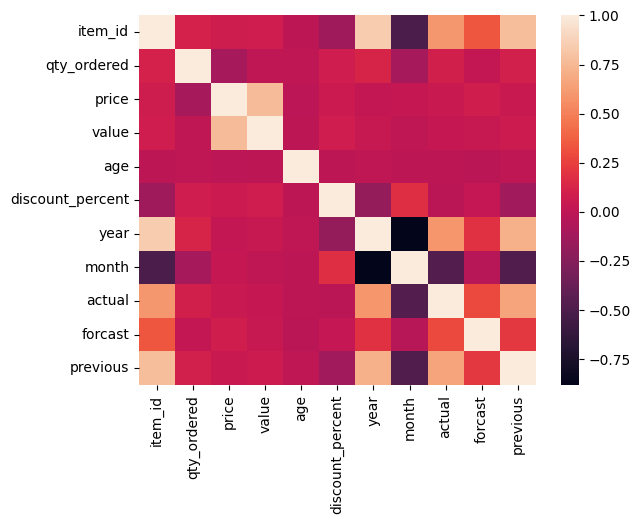

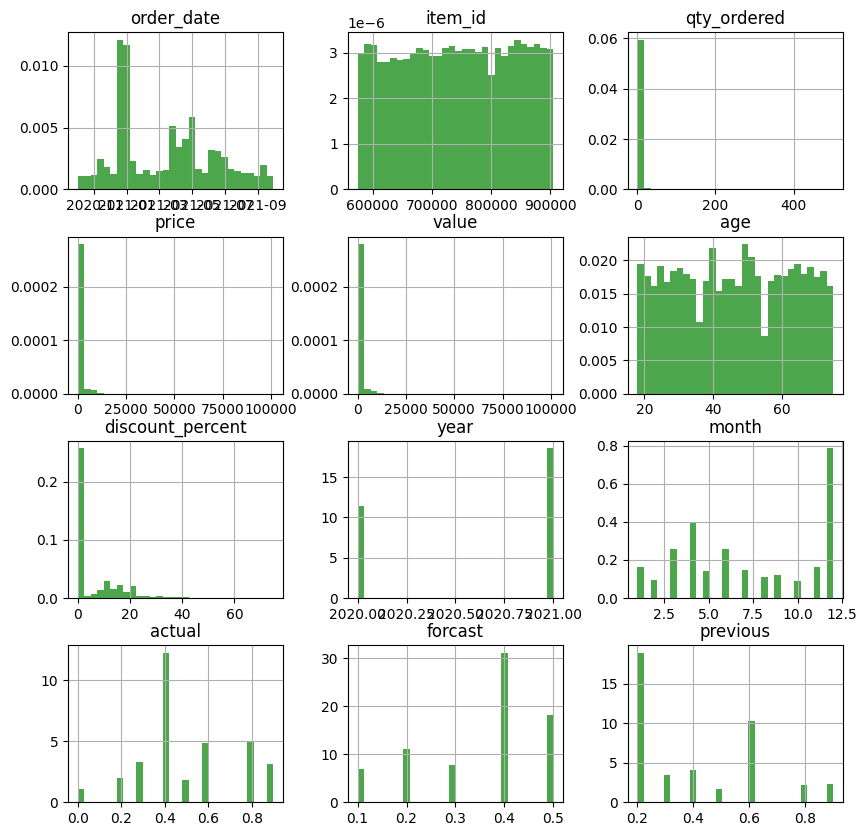

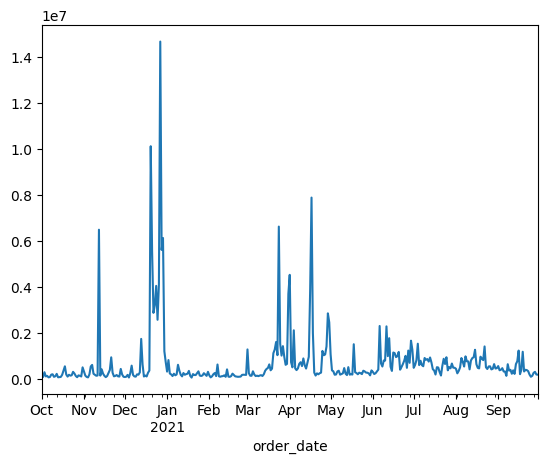

In [14]:
# visualisation
corr = df.corr()
sns.heatmap(corr,annot=False)

df.hist(bins=30, figsize=(10,10), density = 1, color ='green',alpha = 0.7)

f2 = plt.figure()
df.groupby(['order_date'])['value'].sum().plot()

#df[['order_date', 'value']].set_index('order_date').plot()

category
Appliances            33034
Beauty & Grooming     17899
Books                   814
Computing              8110
Entertainment         17352
Health & Sports        8421
Home & Living         13990
Kids & Baby            6492
Men's Fashion         40713
Mobiles & Tablets     61761
Others                26108
School & Education     1090
Soghaat                7250
Superstore            15024
Women's Fashion       28334
Name: user name, dtype: int64


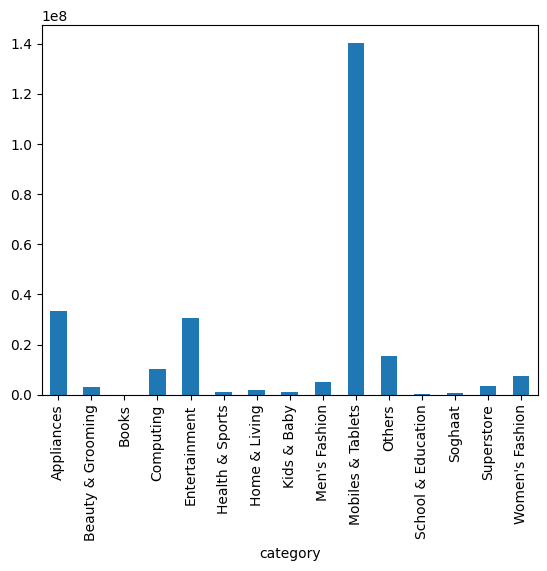

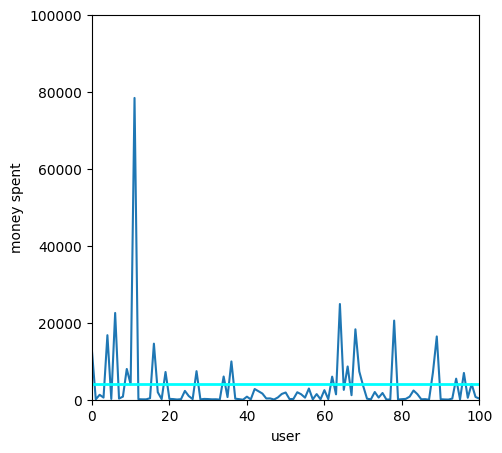

<AxesSubplot: >

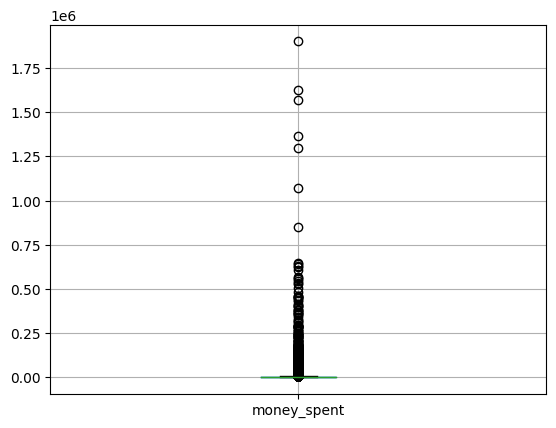

In [16]:
# insights discovery

#how many purchases per category
print(df.groupby('category')['user name'].count())
#revenue per category
revenue = df.groupby('category')['value'].sum()
revenue.plot(kind='bar')

#money spent per user distribution
user = df.groupby('user name')['value'].sum()
user = pd.DataFrame({'money_spent':user}).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(5, 5))
binwidth = 8.0
ax.plot(user)
ax.hlines(y=3.963830e+03,xmin=0, xmax=100000, colors='aqua', linestyles='-', lw=2, label='Single Short Line')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100000])
ax.set_xlabel("user")
ax.set_ylabel("money spent")
plt.show()

print(user.describe())
#user.head()
#user.boxplot()


<AxesSubplot: xlabel='None-category', ylabel='None-category'>

<Figure size 640x480 with 0 Axes>

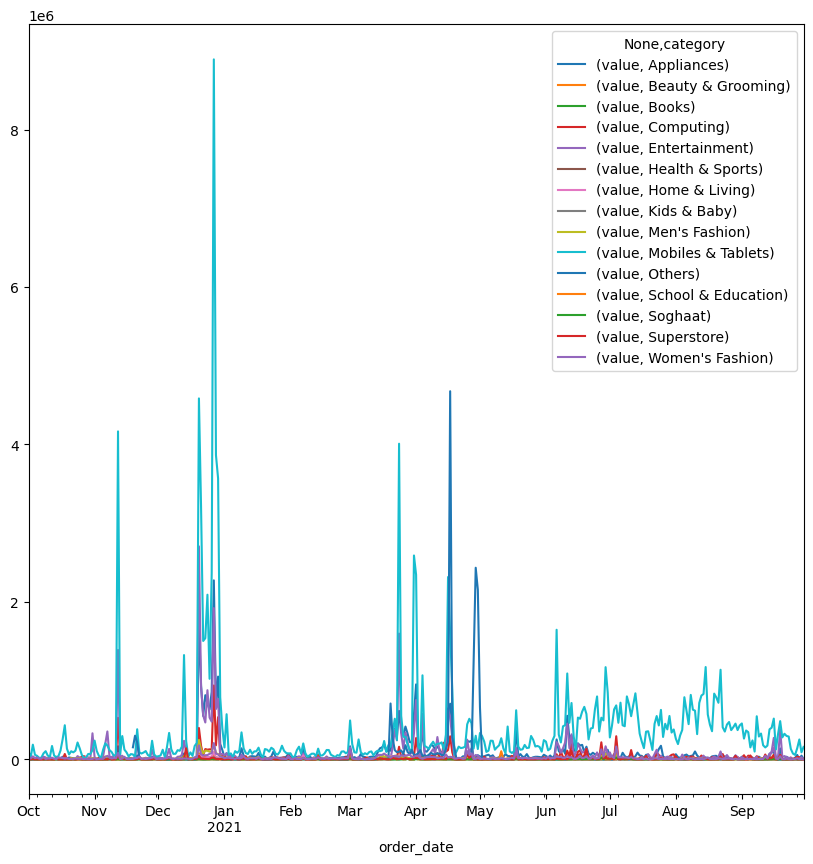

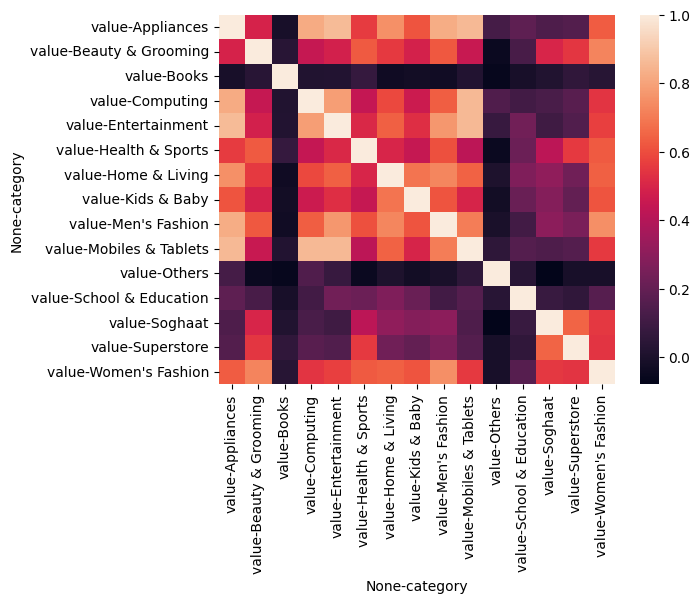

In [8]:
#purchase of different categories over time
f1 = plt.figure()
df2 = df[['order_date', 'category', 'value']]
time_data = df2.groupby(['order_date', 'category']).sum().unstack()
time_data.plot(figsize=(10,10))


#correlation between categories
f2 = plt.figure()
corr = time_data.corr()
sns.heatmap(corr)

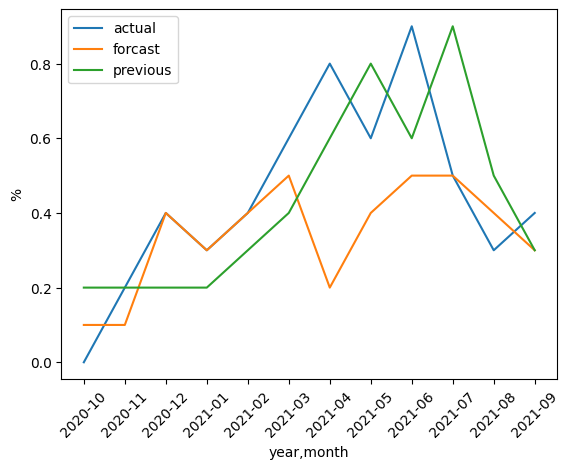

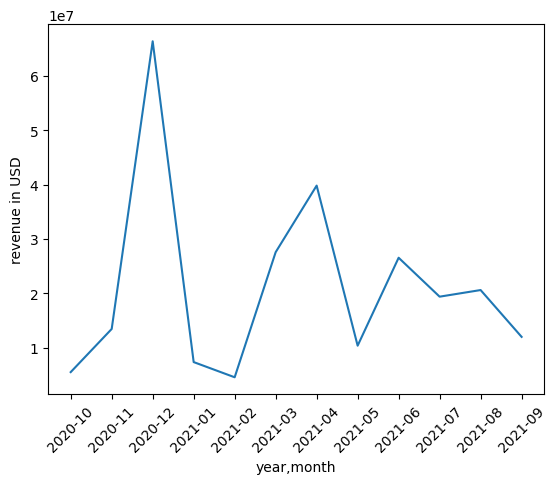

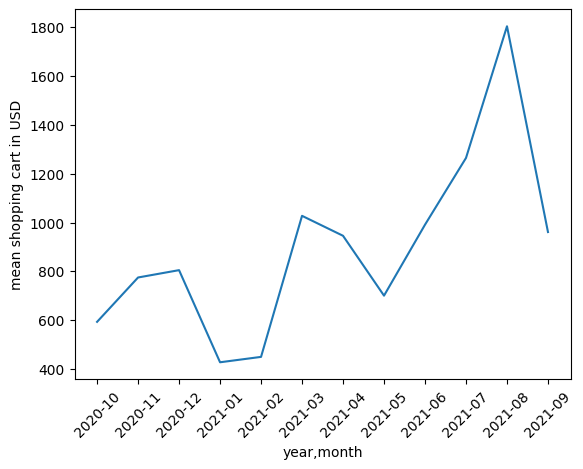

In [17]:
#plot cpi series
df = df.sort_values(by='order_date')
cpi = df.set_index(['year', 'month'])
cpi = cpi[['actual','forcast','previous']]
cpi = cpi.drop_duplicates()
g = cpi
ax = cpi.plot()
ax.set_xticks(range(len(g)))
ax.set_xticklabels(["%s-%02d" % item for item in g.index.tolist()],
rotation=45, ha='center')
ax.set_ylabel("%")

plt.show()
#plt.plot(cpi.forcast)

#plot total purchase power series
value = df.groupby(['year', 'month'])['value'].sum()
ax = value.plot()
ax.set_xticks(range(len(g)))
ax.set_xticklabels(["%s-%02d" % item for item in g.index.tolist()],
rotation=45, ha='center')
ax.set_ylabel("revenue in USD")

plt.show()

#plot total purchase power series
value = df.groupby(['year', 'month'])['value'].mean()
ax = value.plot()
ax.set_xticks(range(len(g)))
ax.set_xticklabels(["%s-%02d" % item for item in g.index.tolist()],
rotation=45, ha='center')
ax.set_ylabel("mean shopping cart in USD")

plt.show()

/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_93613/506943848.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_male = male.groupby(['order_date', 'category']).sum().unstack()
/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_93613/506943848.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_female = female.groupby(['order_date', 'category']).sum().unstack()


--------male-----------
category
Appliances            1.680243e+07
Beauty & Grooming     1.492675e+06
Books                 1.965254e+04
Computing             5.606975e+06
Entertainment         1.535148e+07
Health & Sports       6.634545e+05
Home & Living         8.689494e+05
Kids & Baby           4.505276e+05
Men's Fashion         2.719518e+06
Mobiles & Tablets     6.910605e+07
Others                8.204792e+06
School & Education    6.800546e+04
Soghaat               3.197353e+05
Superstore            1.781313e+06
Women's Fashion       3.863351e+06
Name: value, dtype: float64
--------female-----------
category
Appliances            1.663898e+07
Beauty & Grooming     1.397965e+06
Books                 1.337780e+04
Computing             4.750462e+06
Entertainment         1.507800e+07
Health & Sports       4.587716e+05
Home & Living         1.049368e+06
Kids & Baby           4.413608e+05
Men's Fashion         2.443858e+06
Mobiles & Tablets     7.129233e+07
Others                7.38653

<Figure size 640x480 with 0 Axes>

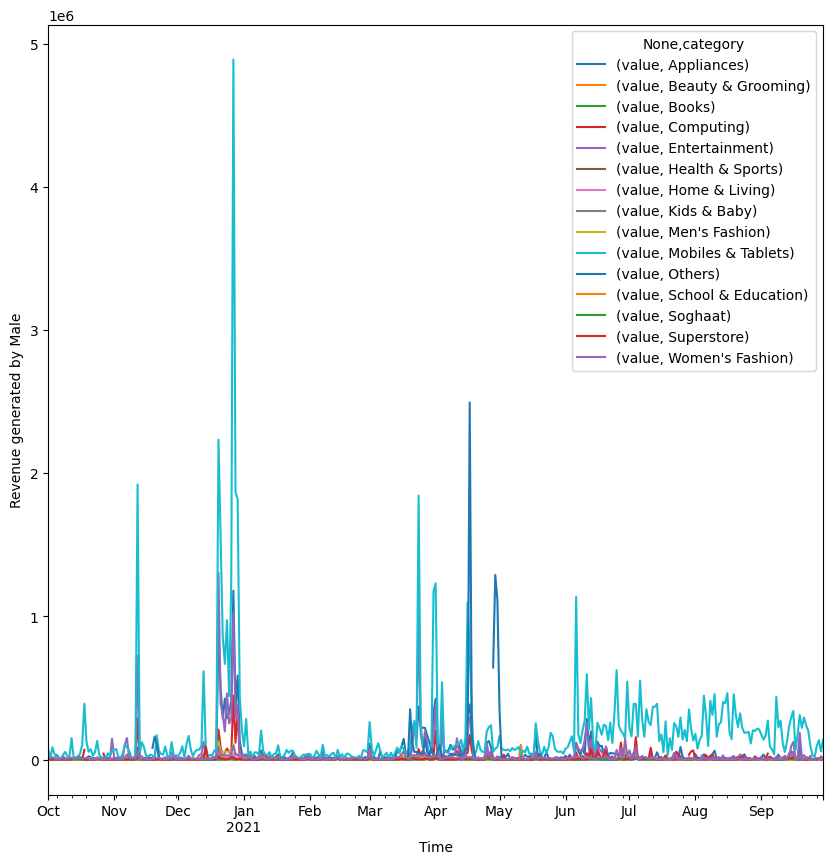

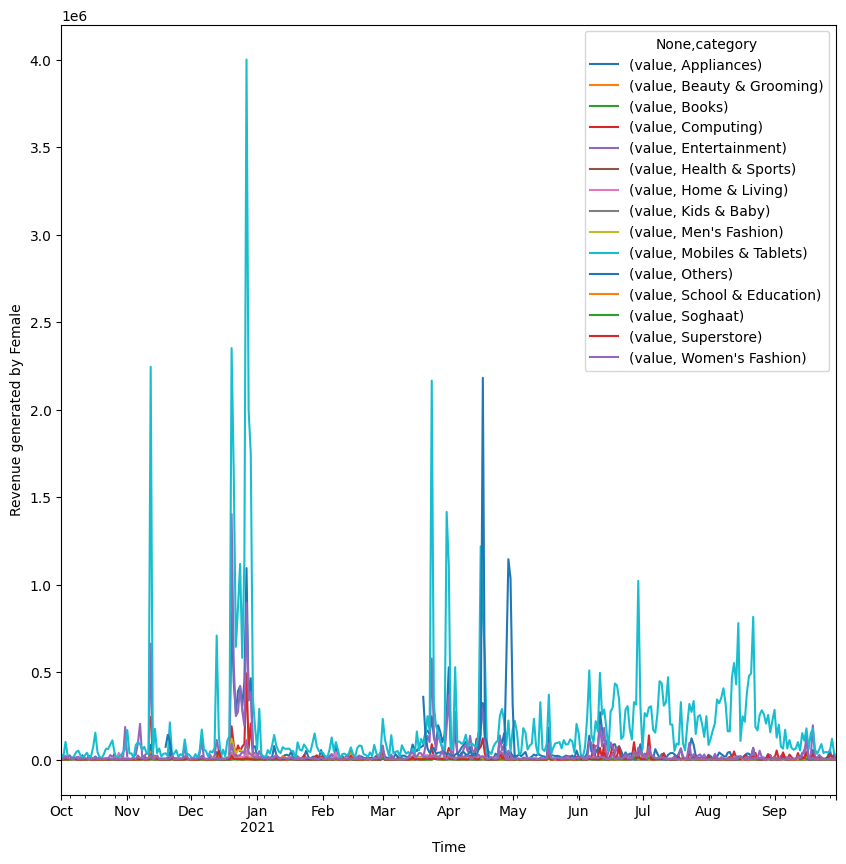

In [10]:
# see purchase behaviour for different genders
f1 = plt.figure()
male = df[['gender','category','value','order_date']].loc[df['gender'] == 'M']
female = df[['gender','category','value','order_date']].loc[df['gender'] == 'F']

time_male = male.groupby(['order_date', 'category']).sum().unstack()
#time_data
ax = time_male.plot(figsize=(10,10))
ax.set_xlabel("Time")
ax.set_ylabel("Revenue generated by Male")
print('--------male-----------')
print(male.groupby(['category'])['value'].sum())


time_female = female.groupby(['order_date', 'category']).sum().unstack()
#time_data
ax = time_female.plot(figsize=(10,10))
ax.set_xlabel("Time")
ax.set_ylabel("Revenue generated by Female")

print('--------female-----------')
print(female.groupby(['category'])['value'].sum())


